This document is used as a brief introduction for students to use scikit-learn in machine learning scenarios.

# 1. Scikit-learn: A Brief Introduction

`sklearn` (short for scikit-learn) is a module basing on `numpy` and `scipy`.
This project is initialized by `David Cournapeau` in 2007.
After years development by the community, it is already one of the most powerful package in Python.

Basically, this package contains all the well-used tools in a complete data mining or machine learning process.

Link to the project: [Github/scikit-learn](https://github.com/scikit-learn/scikit-learn)

## 1.1. What does sklearn contains?

As the picture shows, this package contains all the well-used tools in a complete data mining or machine learning process.

![](ml_map.png)

## 1.2. Installation

```python
#pip3 install -U scikit-learn
```
In a conda environment, sklearn is pre-installed.

# 2. Procedures for a classification task: an example

In this section, we use a classification problem as an example to reveal a complete machine learning process by using `sklearn`.
Several very basic functions are introduced.
We won't include too many details for a specific function (parameters, structures, etc.), and if you are interested, please check the relevant documents.

## 2.1. Before the training (Data)

### 2.1.1. Collect data

`sklearn` contains many built-in datasets and tools to load data.
It is convenient to use the functions in `sklearn.datasets`.

Here we take iris dataset as an example.

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

For the data we collected or created by ourself, we need to make sure it satisfies the requirement of dimensionality.
For normal data vectors, `X` should have a dimension of (m,n), and `Y` should have a dimension of (m,),
where m is the number of data instances, and n is the number of features.

### 2.1.2. Data preprocessing

The dataset usually needs to be processed before training, including but not limited to:
- Standardization/Normalization
- Missing value completion
- Features processing / Dimension selection

For this iris dataset, we need to normalize it.
There is corresponding module in the sklearn.

Besides, we only pick two dimensions and two classes out of the three.

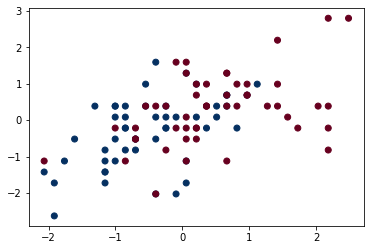

In [18]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# Visualization
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r)

### 2.1.3. Construct training set and test set

Some benchmark datasets provide their train/test splitting.
However, if the data is not split yet, we need to manually divide it.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_2d, y_2d, test_size=0.3, random_state=2)

## 2.2. In the training (Model)

### 2.2.1. Choose model to use

This article only discuss a classification problem.
This is a supervise learning setting.

sklearn contains many built-in models, eg. LinearRegression, SVC, LinearSVC, DecisionTreeClassifier, etc.

Here we took LinearRegression as an example.

In [20]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

LogisticRegression()

### 2.2.2. Model parameter tuning and training (A example, for SVC)

Different models use different hyper-parameters.
Those parameters influence the performance of the models very much.
Normally, we use cross validation to tune the hyperparameter and train the models.

Here we introduce a built-in parameter selection module.
Here we still use SVC as an example.
We search for two hyper-parameter C and gamma.

In [21]:
'''
This part isn't used with Logistic Regression.
'''

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
clf_svc_grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
clf_svc_grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f" % (clf_svc_grid.best_params_, clf_svc_grid.best_score_))

The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


## 2.3. After the training (Performance)

### 2.3.1. Evaluate the performance

After the training, we need to evaluate the performance on the test set.
Common used evaluation methods: accuracy/recall/precision/F1/ROC/AUC etc.

For a trained model, we could use score function to evaluate.
It would return an accuracy score by default.


In [22]:
score = clf_lr.score(X_test, y_test)
print(score)

0.6


sklearn also provides classification_report, which contains more information.

In [23]:
from sklearn.metrics import classification_report

y_pred = clf_lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        18
           1       0.50      0.50      0.50        12

    accuracy                           0.60        30
   macro avg       0.58      0.58      0.58        30
weighted avg       0.60      0.60      0.60        30




### 2.3.2. Visualize the performance

Sometimes we also need to visualize to see the performance.
Here we usually add the label margins to the initial visualization.
Please check the document of `matplotlib` for more information.

C:\Users\Think\AppData\Local\Temp/ipykernel_12744/3009995909.py:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)


(-3.0, 3.0, -3.0, 3.0)

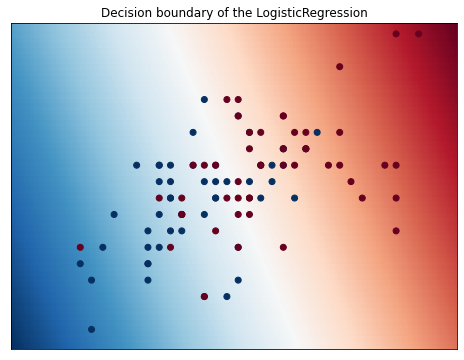

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))

Z = clf_lr.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# visualize decision function for these parameters
plt.title('Decision boundary of the LogisticRegression')
# visualize parameter's effect on decision function
plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r)
plt.xticks(())
plt.yticks(())
plt.axis('tight')